# Lab 6 - SIR Model 

In this lab we try to include some realistic effects in the SIR model and examine their role.

S - Susceptibles

I - Infected 

R - Recovered

In [368]:
import numpy as np
import math
import matplotlib.pyplot as plt
import icecream as ic

In [369]:
t_final = 400
t_start = 0
dt = 0.1  #time step 
n = int(t_final-t_start/dt) # number of time intervals 
N = 762 # total number of people in the population 

In [370]:
S = np.zeros(n)
I = np.zeros(n)  #Storing infecteds 
R = np.zeros(n)  #Storing recovereds

In [371]:
S[0] = N-1 #initial susceptibles - the entire population 
I[0] = 1 #initially, nobody is infected 
R[0] = 0 #hence, the number of recovereds is zero 

In [372]:
def susceptible(beta, S, I):
    return (-beta)*S*I

def infected(beta, alpha, S, I):
    return (beta)*S*I - alpha*I

def recovered(alpha, I):
    return (alpha)*I

In [373]:
beta = 0.00218
alpha = 0.5

In [374]:
# Equation for susceptible v time 

for i in range(1,n):
    S[i] = S[i-1] + susceptible(beta, S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt

# Plot - 6.3.2 Shiflet

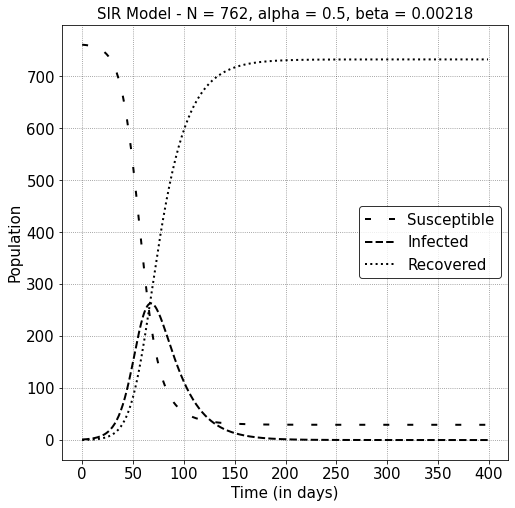

In [375]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(I, label='Infected',ls='--',lw=2, color='k')
plt.plot(R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N = {}, alpha = {}, beta = {}'.format(N,alpha,beta), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

R0 = basic reproduction number = beta/alpha


In [376]:
#beta_val = [0.002, 0.003, 0.004, 0.005, 0.01, 0.1,0.15,0.2,0.25, 0.3, 0.35, 0.4]
#alpha_val = [0.5, 0.4, 0.3, 0.2, 0.1, 0.2,0.1,0.1,0.1, 0.1, 0.1, 0.1]
beta_val = np.linspace(0.0001, 0.0009, 20) #infection rate
alpha_val = [0.3 for i in range(len(beta_val))] #recovery rate


In [377]:
sus = [[0 for i in range(n)] for j in range(len(beta_val)+1)] 
inf = [[0 for i in range(n)] for j in range(len(beta_val)+1)]
rec = [[0 for i in range(n)] for j in range(len(beta_val)+1)]
for k in range(len(beta_val)):
    sus[k][0] = N-10
    inf[k][0] = 10
print(np.shape(sus))
for j in range(0,len(beta_val)):
    for i in range(1,n):
    
        sus[j][i] = sus[j][i-1] + susceptible(beta_val[j], sus[j][i-1], inf[j][i-1])*dt
        inf[j][i] = inf[j][i-1] + infected(beta_val[j], alpha_val[j], sus[j][i-1], inf[j][i-1])*dt
        rec[j][i] = rec[j][i-1] + recovered(alpha_val[j], inf[j][i-1])*dt



(21, 400)


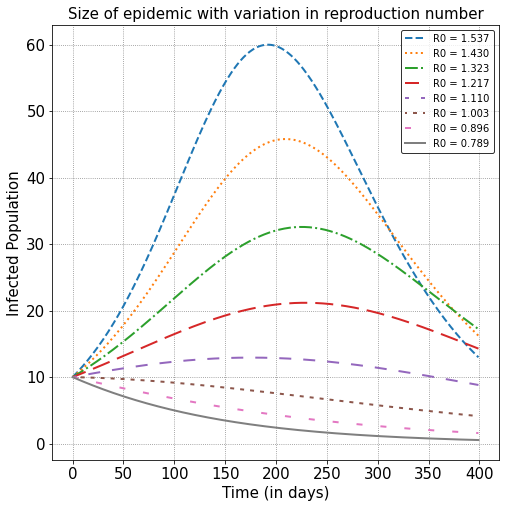

In [378]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#colours 
col = ['k','b','g','r','y','grey','cyan','brown']
ls = ['--',':','-.',(2,(9,4)),(4,(6,6)),(6,(2,3)),(0, (3, 9)),'-']
#plots
j=0
for i in range(len(beta_val)-8,4,-1):
    #plt.plot(sus[i], label='Sus R0 = {:.3f}'.format(beta_val[i]/alpha_val[i]), ls=(0, (3, 9)),lw=2, color=col[i])
    plt.plot(inf[i], label='R0 = {:.3f}'.format(beta_val[i]/alpha_val[i]*N),ls=ls[j],lw=2)
    j=j+1
    #plt.plot(rec[i], label='Recovered',ls=':',lw=2, color=col[i])

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Infected Population', fontsize=15, color='k')
plt.title('Size of epidemic with variation in reproduction number', fontsize=15, color='k')
plt.legend(fontsize=10, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()


In [379]:
sums = np.zeros(len(beta_val))
for i in range(len(beta_val)):
    sums[i]= (np.array(inf[i]).max())
print(sums)

[ 10.          10.          10.          10.          10.
  10.          10.          10.          12.93301507  21.17993836
  32.58750634  45.80995288  60.00369387  74.63073932  89.34680184
 103.93228805 118.24350034 132.19514289 145.73518492 158.83753037]


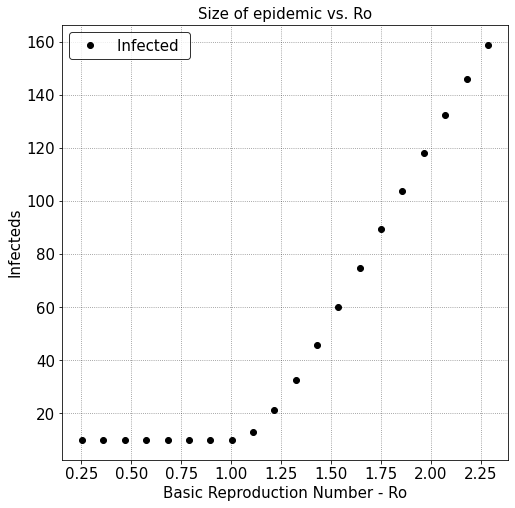

In [380]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

r = np.array(beta_val)/np.array(alpha_val)*(N)

#plots

plt.plot(r,sums, 'ko',label='Infected ',lw=2)
    #plt.plot(rec[i], label='Recovered',ls=':',lw=2, color=col[i])

#plot formatting
plt.xlabel('Basic Reproduction Number - Ro', fontsize=15, color='k')
plt.ylabel('Infecteds', fontsize=15, color='k')
plt.title('Size of epidemic vs. Ro', fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# Varying initial susceptibles

In [381]:
t_final = 130
t_start = 0
dt = 0.1  #time step 
n = int(t_final-t_start/dt) # number of time intervals 
N = 762 # total number of people in the population 

In [382]:
s = np.arange(N-100,N,10)
s

array([662, 672, 682, 692, 702, 712, 722, 732, 742, 752])

In [383]:
sus_var = np.array([[0 for i in range(n)] for j in range(len(s)+1)])
inf = np.array([[0 for i in range(n)] for j in range(len(s)+1)])
rec = np.array([[0 for i in range(n)] for j in range(len(s)+1)])
inf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [384]:
beta = 0.00218
alpha = 0.5
for j in range(len(s)):
    sus_var[j][0] = s[j]
    inf[j][0] = 10
    print(j)
    for i in range(1,n):
        sus_var[j][i] = sus_var[j][i-1] + susceptible(beta, sus_var[j][i-1], inf[j][i-1])*dt
        inf[j][i] = inf[j][i-1] + infected(beta, alpha, sus_var[j][i-1], inf[j][i-1])*dt
        rec[j][i] = rec[j][i-1] + recovered(alpha, inf[j][i-1])*dt
inf[1]

0
1
2
3
4
5
6
7
8
9


array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

9
8
7
6
5
4
3


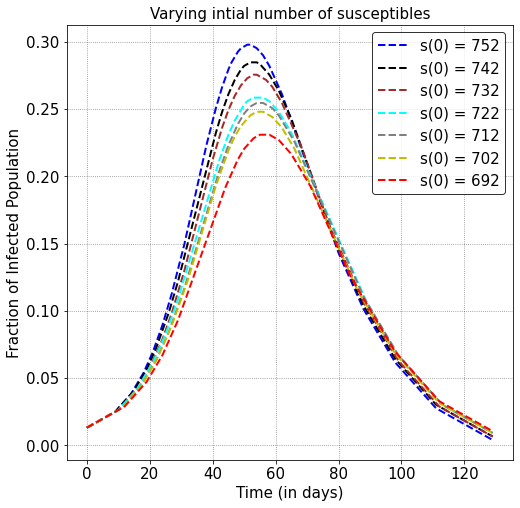

In [385]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#colours 
col = ['k','b','g','r','y','grey','cyan','brown','k','b','g']
#plots
for i in range(len(s)-1,2,-1):
    print(i)
    #plt.plot(sus[i], label='Sus R0 = {:.3f}'.format(beta_val[i]/alpha_val[i]), ls=(0, (3, 9)),lw=2, color=col[i])
    plt.plot(np.array(inf[i])/N, label='s(0) = {:.0f}'.format(s[i]),ls='--',lw=2, color=col[i])
    #plt.plot(rec[i], label='Recovered',ls=':',lw=2, color=col[i])

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Fraction of Infected Population', fontsize=15, color='k')
plt.title('Varying intial number of susceptibles', fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# Considering the effects of vaccination

In [496]:
def susceptible_v(beta, v, S, I):
    return (-beta)*S*I - v*S
def susceptible_v_mu(beta, v, mu, S, I):
    return (-beta)*S*I - v*S + mu*v*S

In [497]:
t_final = 50
t_start = 0
dt = 0.1  #time step 
n = int((t_final-t_start)/dt) # number of time intervals 
N = 762 # total number of people in the population 

S = np.zeros(n)
I = np.zeros(n)  #Storing infecteds 
R = np.zeros(n)  #Storing recovereds
n

500

In [498]:
beta = 0.00218
alpha = 0.5
v = 0.15
N = 762

In [503]:
# Equation for susceptible v time 
S[0] = N
I[0] = 1


for i in range(1,n):
    S[i] =  S[i-1] + susceptible_v_mu(beta,v,mu,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt

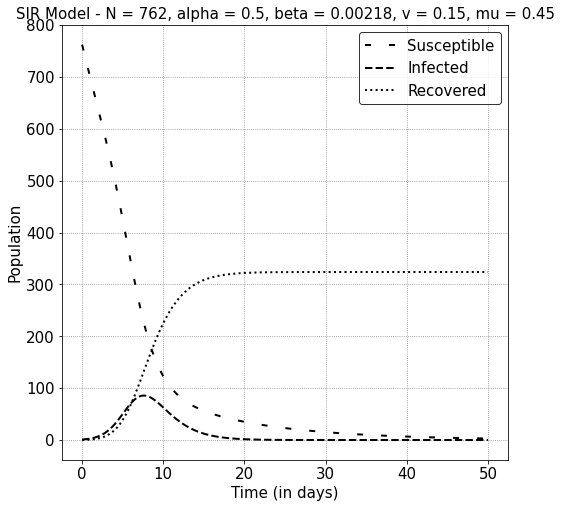

In [505]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(t,S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(t,I, label='Infected',ls='--',lw=2, color='k')
plt.plot(t,R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N = {}, alpha = {}, beta = {}, v = {}, mu = {}'.format(N,alpha,beta,v,mu), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

In [434]:
# Equation for susceptible v time 
S[0] = N
I[0] = 1
R[0] = 0
mu = 0.45 # vaccine efficacy variable (1-mu = efficacy rate of vaccine)
for i in range(1,n):
    S[i] = S[i-1] + susceptible_v_mu(beta,v, mu,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt

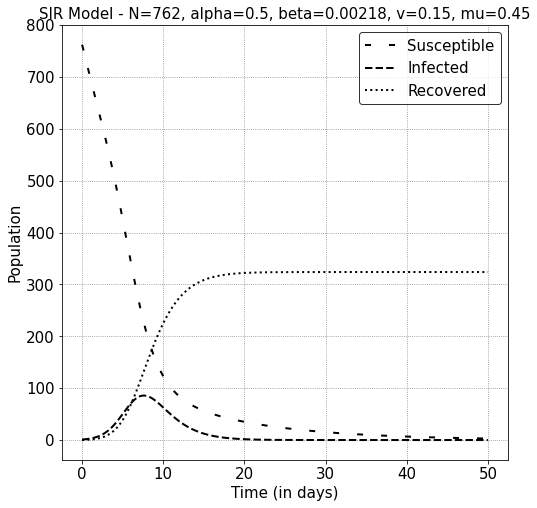

In [435]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(t,S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(t,I, label='Infected',ls='--',lw=2, color='k')
plt.plot(t,R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N={}, alpha={}, beta={}, v={}, mu={}'.format(N,alpha,beta,v,mu), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# Incorporating lockdown

In [352]:
# Equation for susceptible v time 


t_final = 100
t_start = 0
dt = 0.1  #time step 
n = int((t_final-t_start)/dt) # number of time intervals 
N = 762 # total number of people in the population 


S = np.zeros(n)
I = np.zeros(n)  #Storing infecteds 
R = np.zeros(n)  #Storing recovereds


S[0] = N
I[0] = 1
R[0] = 0
beta = 0.00218
alpha = 0.5

for i in range(1,int(10/dt + 1)):
    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt
for i in range(int(10/dt + 1), int(30/dt + 1)):
    beta = beta - 0.1*beta
   
    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt
for i in range(int(30/dt + 1), int(60/dt +1)):

    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt
for i in range(int(60/dt + 1), n):
    beta = beta + 0.01*beta
    
    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt


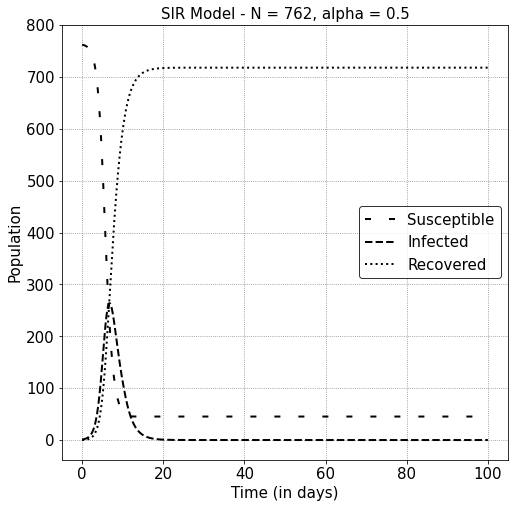

In [353]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(t, S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(t, I, label='Infected',ls='--',lw=2, color='k')
plt.plot(t, R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N = {}, alpha = {}'.format(N,alpha), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

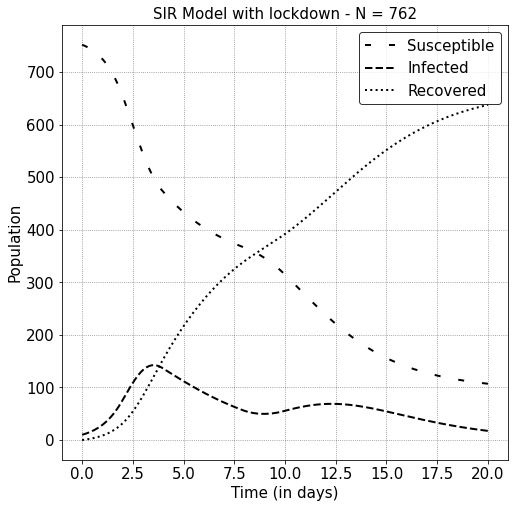

In [493]:
def func(day):
    if day >= 4 and day <= 8:
        return 0.00068;
    if day >= 2 and day < 4:
        return 0.00218 - (day - 2) * (0.00075);
    if day > 8 and day <= 10:
        return 0.00068 + (day - 8) * (0.00075);
    return 0.00218;
def plotter_lockdown(S0, I0, R0, N, alfa, tstep, tfinal):
    niter = (tfinal / tstep) + 1
    S = np.zeros(int(niter))
    I = np.zeros(int(niter))
    R = np.zeros(int(niter))
    t = np.linspace(0, tfinal, int(niter))
    S[0] = S0
    I[0] = I0
    R[0] = R0
  
    for i in range(int(niter)):
        if i == 0:
            continue
        beta = func(i * tstep);
        S[i] = S[i - 1] - (S[i - 1] * (beta * I[i - 1])) * tstep
        I[i] = I[i - 1] + (I[i - 1] * (((beta * S[i - 1])) - alfa)) * tstep
        R[i] = R[i - 1] + (alfa * I[i - 1]) * tstep
    
    return [np.array(t), np.array(S), np.array(I), np.array(R)]

S0 = 752;
I0 = 10;
R0 = 0;
N = 762;
alfa = 0.5; # /day
beta = 0.00218;
tstep = 0.1;
tfinal = 20;

[t, S, I, R] = plotter_lockdown(S0, I0, R0, N, alfa, tstep, tfinal);
#make figure
fig, ax = plt.subplots(figsize=[8,8])
#t = np.linspace(0,t_final, int(n))

#plots
plt.plot(t, S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(t, I, label='Infected',ls='--',lw=2, color='k')
plt.plot(t, R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model with lockdown - N = {}'.format(N,alfa,beta), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# SEIR Model

In [266]:
def susceptible(b, q, k, u, s, iu, sq):
    return -(b + q - q*b)*k*s*iu/N + u*sq 

def susceptible_q(b, q, k, u, S, Iu, Sq):
    return q*(1-b)*k*S*Iu/N - u*Sq

def exposed(b, q, k, p, S, Iu, E):
    return (1-q)*S*Iu*k*b/N - p*E

def exposed_q(b, q, k, u, S, Iu, Eq):
    return q*S*Iu*k*b/N  - p*Eq

def infected_u(p, w, v, m, E, Iu):
    return p*E - w*Iu - v*Iu - m*Iu

def infected_q(p, w, v, m, Eq, Iq):
    return p*Eq - w*Iq - v*Iq - m*Iq

def infected_i(w, v, Iq, Iu, Ii):
    return w*Iq + w*Iu - v*Ii - m*Ii

def death(m, Iq, Iu, Ii):
    return m*Iq + m*Iu + m*Ii 

def recovered(v, Iq, Iu, Ii):
    return v*Iq + v*Iu + v*Ii 

In [286]:
# Equation for susceptible v time 


t_final = 200
t_start = 0
dt = 1  #time step 
n = int((t_final-t_start)/dt) # number of time intervals 
N = 1000000 # total number of people in the population 

b = 0.006
k = 10
q = np.arange(0,1,0.2)
u = 0.1
p = 0.2
m = 0.0975
v = 0.04
w = 0.0625

rows = len(q)
cols = n
S = np.array([[0 for i in range(cols)] for j in range(rows)])
Sq = np.array([[0 for i in range(cols)] for j in range(rows)])
E = np.array([[0 for i in range(cols)] for j in range(rows)])
Eq = np.array([[0 for i in range(cols)] for j in range(rows)])
Iu = np.array([[0 for i in range(cols)] for j in range(rows)])
Iq = np.array([[0 for i in range(cols)] for j in range(rows)])
D = np.array([[0 for i in range(cols)] for j in range(rows)])
R = np.array([[0 for i in range(cols)] for j in range(rows)])
Ii = np.array([[0 for i in range(cols)] for j in range(rows)])


for j in range(len(q)):
    S[j][0] = N-10000
    Sq[j][0] = 0
    E[j][0] = 0
    Eq[j][0] = 0
    Iu[j][0] = 10000
    Iq[j][0] = 0
    Ii[j][0] = 0
    D[j][0] = 0
    R[j][0] = 0
    for i in range(1,n):
        S[j][i] = S[j][i-1] + susceptible(b, q[j], k, u, S[j][i-1], Iu[j][i-1], Sq[j][i-1])*dt
        Sq[j][i] = Sq[j][i-1] + susceptible_q(b, q[j], k, u, S[j][i-1], Iu[j][i-1], Sq[j][i-1])*dt
        E[j][i] = E[j][i-1] + exposed(b, q[j], k, p, S[j][i-1], Iu[j][i-1], E[j][i-1])*dt
        Eq[j][i] = Eq[j][i-1] + exposed_q(b, q[j], k, u, S[j][i-1], Iu[j][i-1], Eq[j][i-1])*dt
        Iu[j][i] = Iu[j][i-1] + infected_u(p, w, v, m, E[j][i-1], Iu[j][i-1])*dt
        Iq[j][i] = Iq[j][i-1] + infected_q(p, w, v, m, Eq[j][i-1], Iq[j][i-1])*dt
        D[j][i] = D[j][i-1] + death(m, Iq[j][i-1], Iu[j][i-1], Ii[j][i-1])*dt
        Ii[j][i] = Ii[j][i-1] + infected_i(w,v,Iq[j][i-1],Iu[j][i-1],Ii[j][i-1])*dt
        R[j][i] = R[j][i-1] + recovered(v, Iq[j][i-1], Iu[j][i-1], Ii[j][i-1])*dt


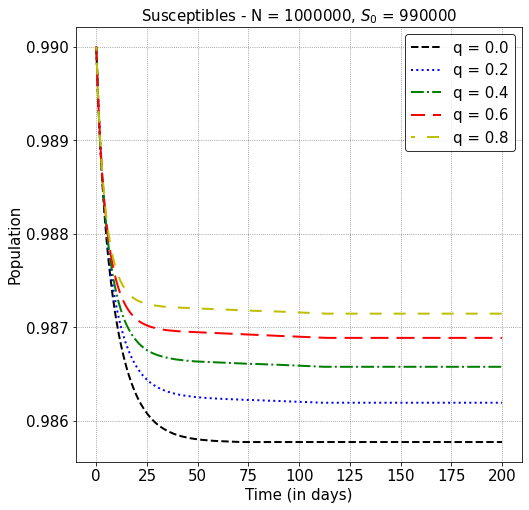

In [287]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
for i in range(len(q)):
    plt.plot(t, (S[i]+Sq[i])/N, label='q = {:.1f}'.format(q[i]), ls=ls[i],lw=2, color=col[i])
#plt.plot(t, S/N, label='Infected',ls='--',lw=2, color='k')
#plt.plot(t, R/N, label='Recovered',ls='-',lw=2, color='k')
#plt.plot(t, D/N, label='Deaths',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('Susceptibles - N = {}, $S_0$ = {:.0f}'.format(N,S[0][0]), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

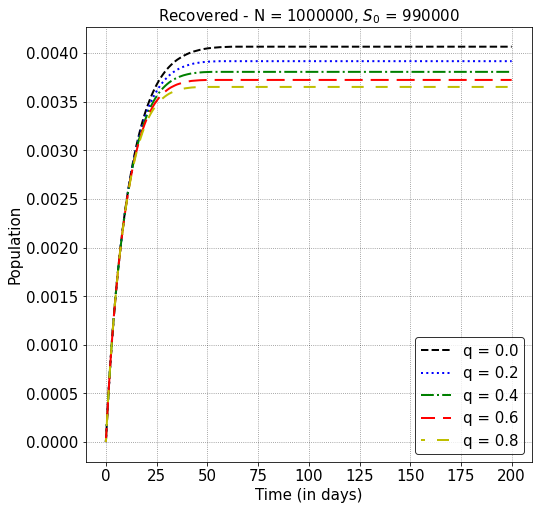

In [288]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
for i in range(len(q)):
    #plt.plot(t, (S[i]+Sq[i])/N, label='q = {:.1f}'.format(q[i]), ls=ls[i],lw=2, color=col[i])
    plt.plot(t, R[i]/N, label='q = {:.1f}'.format(q[i]),ls=ls[i],lw=2, color=col[i])
#plt.plot(t, R/N, label='Recovered',ls='-',lw=2, color='k')
#plt.plot(t, D/N, label='Deaths',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('Recovered - N = {}, $S_0$ = {:.0f}'.format(N,S[0][0]), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

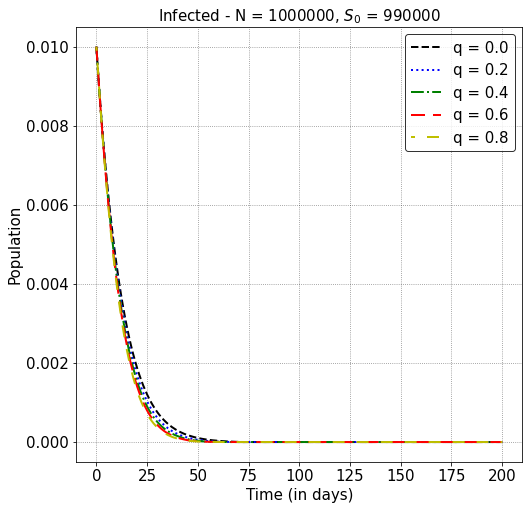

In [297]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
for i in range(len(q)):
    #plt.plot(t, (S[i]+Sq[i])/N, label='q = {:.1f}'.format(q[i]), ls=ls[i],lw=2, color=col[i])
    plt.plot(t, (Ii[i]+Iu[i]+Iq[i]+E[i]+Eq[i])/N, label='q = {:.1f}'.format(q[i]),ls=ls[i],lw=2, color=col[i])
#plt.plot(t, R/N, label='Recovered',ls='-',lw=2, color='k')
#plt.plot(t, D/N, label='Deaths',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('Infected - N = {}, $S_0$ = {:.0f}'.format(N,S[0][0]), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

In [304]:
def plotter_sars(k, b, p, v, m, u, q, w, N0, iu0, dt, tfinal) :
    niter = (tfinal / dt) + 1;

    S = np.zeros(int(niter)); # Susceptible (S)
    Sq = np.zeros(int(niter)); # Susceptible Quarantine (Sq)
  
    E = np.zeros(int(niter)); # Exposed (E)
    Eq = np.zeros(int(niter)); # Exposed Quarantine (Eq)
  
    Iu = np.zeros(int(niter)); # Infectious Undetected (Iu)
    Iq = np.zeros(int(niter)) # Infectious Quarantined (Iq)
    Id = np.zeros(int(niter)); # Infectious Isolated (Id)
 
    D = np.zeros(int(niter)); # Dead (D)
    R = np.zeros(int(niter)); # Recovered (R)
    N = np.zeros(int(niter)); # Total Population (N)

    S[0] = N0 - iu0;
    Iu[0] = iu0;
    N[0] = N0;

    t = np.linspace(0, tfinal, int(niter));

    for i in range(int(niter)):
        if i == 0:
            continue;
        contacts = k * S[i - 1] * Iu[i - 1] / N[i - 1];
    
    #Susceptibles
    S[i] = S[i - 1]  + (u * Sq[i - 1] - contacts * ((1 - b) * q + b * (q + (1 - q)))) * dt;
    Sq[i] = Sq[i - 1] - (u * Sq[i - 1] + contacts * (1 - b) * q) * dt;

    #Exposed
    E[i] = E[i - 1] + (contacts * b * (1 - q) - p * E[i - 1]) * dt;
    Eq[i] = Eq[i - 1] + (contacts * b * q - p * Eq[i - 1]) * dt;
    
    #Infected
    Iu[i] = Iu[i - 1] + (p * E[i - 1]  - (v + m + w) * Iu[i - 1]) * dt;
    Iq[i] = Iq[i - 1] + (p * Eq[i - 1] - (v + m + w) * Iq[i - 1]) * dt;
    Id[i] = Id[i - 1] + (w * (Iu[i - 1] + Iq[i - 1]) - (v + m) * Id[i - 1]) * dt; 

    D[i] = D[i - 1] + (m * (Iq[i - 1] + Iu[i - 1] + Id[i - 1])) * dt;
    R[i] = R[i - 1] + (v * (Iq[i - 1] + Iu[i - 1] + Id[i - 1])) * dt;
    N[i] = N0 - D[i - 1];
    
    return [np.array(t), np.array(S), np.array(Sq), np.array(E), np.array(Eq), np.array(Iu), np.array(Iq), np.array(Id), np.array(D), np.array(R) , np.array(N)];

/Users/riddhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


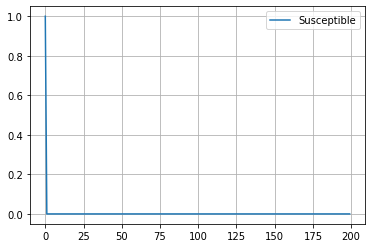

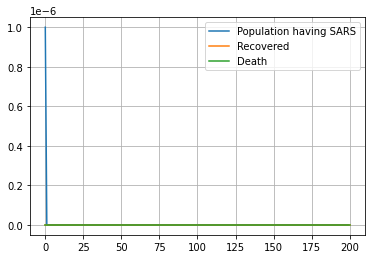

In [305]:
k = 10;
b = 0.06;
p = 1/5;
v = 0.04;
m = 0.0975;
u = 1/10;
w = 0.0625;
q = 0.2;
Iu0 = 10;
N0 = 10000000;
dt = 1;
tfinal = 200;

[t, S, Sq, E, Eq, Iu, Iq, Id, D, R, N] = plotter_sars(k, b, p, v, m, u, q, w, N0, Iu0, dt, tfinal);

plt.plot(t, (S + Sq) / N0, label = 'Susceptible');
plt.grid();
plt.legend();
plt.show();

plt.plot(t, (E + Eq + Iu + Iq + Id) / N0, label = 'Population having SARS');
plt.plot(t, R / N0, label = 'Recovered');
plt.plot(t, D / N0, label = 'Death');
plt.legend();
plt.grid();
plt.show();

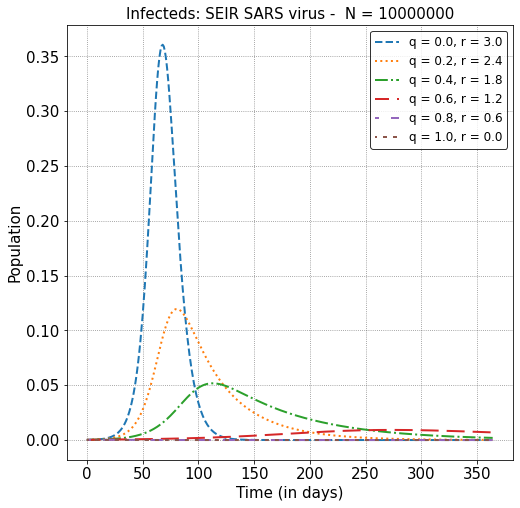

In [555]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
N=10000000
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return u*Sq - k*q*(1-b)*Iu*S/N - k*q*b*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return v*(Iu + Iq + Id)

q_values =np.arange(0,1.2,0.2)
rr=[]
ii=[]
ss=[]
death=[]
rec=[]
color = iter(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange', 'tab:brown', 'tab:pink'])
plt.figure(figsize=[8,8])
#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('Infecteds: SEIR SARS virus -  N = {}'.format(N), fontsize=15, color='k')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
r_values = np.zeros(len(q_values))
#show plot
j = 0
for q in q_values:
    r_values[j] = (k*b)*(1-q)/(v+m+w)
    start_time = 0
    end_time = 365
    dt = 1
    t = np.arange(start_time,end_time,dt)
    n = int((end_time - start_time) / dt )

    S = np.zeros(n)
    Sq = np.zeros(n)
    E = np.zeros(n)
    Eq = np.zeros(n)
    Iu = np.zeros(n)
    Id = np.zeros(n)
    R = np.zeros(n)
    D = np.zeros(n)
    Iq = np.zeros(n)

    S[0] = N - 1000
    Iu[0] = 1000
    
    color = iter(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange', 'tab:brown', 'tab:pink'])
    for i in range(1,len(S)):
        S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    plt.plot((Iu+Id+Iq+E+Eq)/N, label = 'q = {:.1f}, r = {:.1f}'.format(q,r_values[j]), ls=ls[j] , lw = 2) 
    j = j +1
plt.legend(fontsize=12, loc='best', edgecolor = 'k')
plt.show()

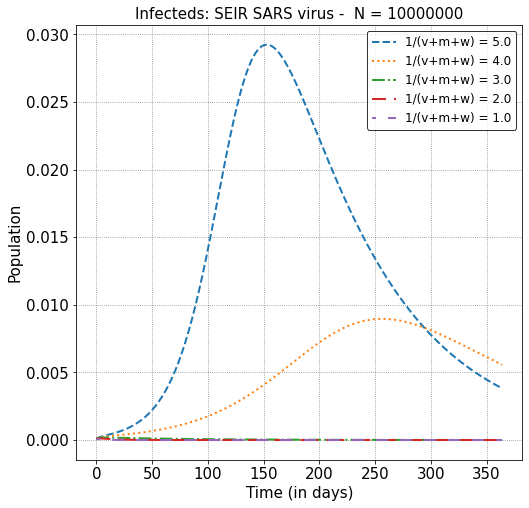

In [566]:
b = 0.06 
k = 10
q=0.5
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
#v = 0.04
w = 0.0625
N=10000000
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return u*Sq - k*q*(1-b)*Iu*S/N - k*q*b*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return v*(Iu + Iq + Id)

v_values =[0.04,0.09,0.17,0.34,0.84]
rr=[]
ii=[]
ss=[]
death=[]
rec=[]
color = iter(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange', 'tab:brown', 'tab:pink'])
plt.figure(figsize=[8,8])
#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('Infecteds: SEIR SARS virus -  N = {}'.format(N), fontsize=15, color='k')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
j = 0
for v in v_values:
    start_time = 0
    end_time = 365
    dt = 1
    t = np.arange(start_time,end_time,dt)
    n = int((end_time - start_time) / dt )

    S = np.zeros(n)
    Sq = np.zeros(n)
    E = np.zeros(n)
    Eq = np.zeros(n)
    Iu = np.zeros(n)
    Id = np.zeros(n)
    R = np.zeros(n)
    D = np.zeros(n)
    Iq = np.zeros(n)

    S[0] = N - 1000
    Iu[0] = 1000
    
    color = iter(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange', 'tab:brown', 'tab:pink'])
    for i in range(1,len(S)):
        S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    plt.plot((Iu+Id+Iq+E+Eq)/N, label = '1/(v+m+w) = {:.1f}'.format(1/(v+m+w)), ls=ls[j] , lw = 2) 
    j = j +1
plt.legend(fontsize=12, loc='best', edgecolor = 'k')
plt.show()

In [563]:
v_values[len(v_values)-1]+m+w

0.8000000000000002

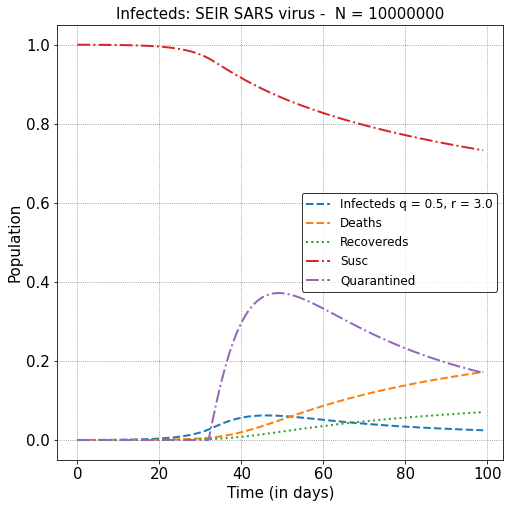

In [605]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04

N=10000000
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return u*Sq - k*q*(1-b)*Iu*S/N - k*q*b*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
    return v*(Iu + Iq + Id)

q_values = [0]
rr=[]
ii=[]
ss=[]
death=[]
rec=[]
color = iter(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange', 'tab:brown', 'tab:pink'])
plt.figure(figsize=[8,8])
#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('Infecteds: SEIR SARS virus -  N = {}'.format(N), fontsize=15, color='k')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
r_values = np.zeros(len(q_values))
#show plot
j = 0
for q in q_values:
    r_values[j] = (k*b)*(1-q)/(v+m+w)
    start_time = 0
    end_time = 100
    dt = 1
    t = np.arange(start_time,end_time,dt)
    n = int((end_time - start_time) / dt )
    
    S = np.zeros(n)
    Sq = np.zeros(n)
    E = np.zeros(n)
    Eq = np.zeros(n)
    Iu = np.zeros(n)
    Id = np.zeros(n)
    R = np.zeros(n)
    D = np.zeros(n)
    Iq = np.zeros(n)

    S[0] = N - 1000
    Iu[0] = 1000
    w = 0
    color = iter(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange', 'tab:brown', 'tab:pink'])
    for i in range(1,int(n/3)):
        S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    w = 0.0625
    q = 0.5
    for i in range(int(n/3), n):
        S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
        R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    plt.plot((Iu+Id+Iq+E+Eq)/N, label = 'Infecteds q = {:.1f}, r = {:.1f}'.format(q,r_values[j]), ls=ls[j] , lw = 2) 
    plt.plot((D)/N, label = 'Deaths', ls=ls[j] , lw = 2)
    plt.plot((R)/N, label = 'Recovereds', ls=ls[j+1] , lw = 2)
    plt.plot((S+Sq)/N, label = 'Susc', ls=ls[j+2] , lw = 2)
    plt.plot((Sq+Eq+Iq)/N, label = 'Quarantined', ls=ls[j+2] , lw = 2)
    j = j +1
plt.legend(fontsize=12, loc='best', edgecolor = 'k')
plt.show()

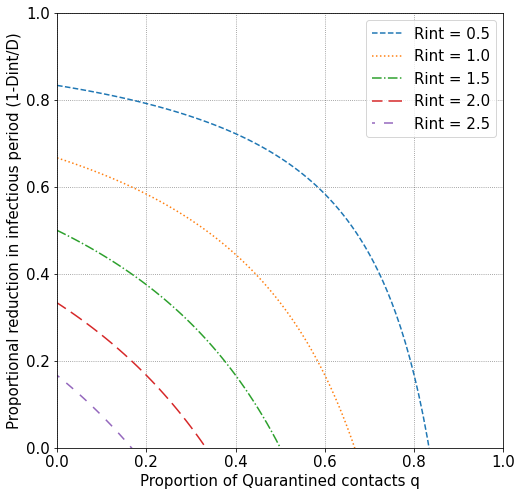

In [602]:
R = 3
q = np.linspace(0, 0.99, 100);
Rint = np.linspace(0.5, 2.5, 5);
plt.figure(figsize=[8,8])
#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
#plt.title('Infecteds: SEIR SARS virus -  N = {}'.format(N), fontsize=15, color='k')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
j=0
for z in Rint:
    Y = [];
    for x in q:
        Y.append(1 - z / (R * (1 - x)));
    plt.plot(q, Y, ls=ls[j], label='Rint = {}'.format(z))
    j=j+1

plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('Proportional reduction in infectious period (1-Dint/D)');
plt.xlabel('Proportion of Quarantined contacts q');
plt.legend(fontsize=15)
plt.show();